In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import multivariate_normal, permutation
import pandas as pd
from pandas import DataFrame, Series

%matplotlib inline

np.random.seed(20160614)
tf.set_random_seed(20160614)

In [2]:
def generate_datablock(n, mu, var, t):
    data = multivariate_normal(mu, np.eye(2) * var, n)
    df = DataFrame(data, columns = ['x1', 'x2'])
    df['t' ] = t 
    return df

df0 = generate_datablock(15, [7, 7], 22, 0)
df1 = generate_datablock(15, [22, 7], 22, 0)
df2 = generate_datablock(10, [7, 22], 22, 0)
df3 = generate_datablock(25, [20, 20], 22, 1)

df = pd.concat([df0, df1, df2, df3], ignore_index=True)
train_set = df.reindex(permutation(df.index)).reset_index(drop=True)

In [3]:
train_x = train_set[['x1', 'x2']].as_matrix()
train_t = train_set['t'].as_matrix().reshape([len(train_set), 1])

In [4]:
num_units = 4
mult = train_x.flatten().mean()

x  = tf.placeholder(tf.float32, [None, 2])

w1 = tf.Variable(tf.truncated_normal([2, num_units]))
b1 = tf.Variable(tf.zeros([num_units]))
#hidden1 = tf.nn.tanh(tf.matmul(x, w1) + b1 * mult)
hidden1 = tf.nn.relu(tf.matmul(x, w1) + b1 * mult)

w0 = tf.Variable(tf.zeros([num_units, 1]))
b0 = tf.Variable(tf.zeros([1]))
p = tf.nn.sigmoid(tf.matmul(hidden1, w0) + b0 * mult)

In [5]:
t = tf.placeholder(tf.float32, [None, 1])
loss = -tf.reduce_sum(t * tf.log(p) + (1-t)*tf.log(1-p))
train_step = tf.train.GradientDescentOptimizer(0.0005).minimize(loss)
correct_predictionn = tf.equal(tf.sign(p-0.5), tf.sign(t-0.5))
accuracy = tf.reduce_mean(tf.cast(correct_predictionn, tf.float32))

In [6]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

In [7]:
i = 0
for _ in range(4000):
    i += 1
    sess.run(train_step, feed_dict={x:train_x, t:train_t})
    if i % 100 == 0:
        loss_val, acc_val = sess.run([loss, accuracy], feed_dict={x:train_x, t:train_t})
        print ('Step: %d, Loss: %f, Accuracy: %f' % (i, loss_val, acc_val))

Step: 100, Loss: 9.366992, Accuracy: 0.938462
Step: 200, Loss: 8.049070, Accuracy: 0.938462
Step: 300, Loss: 7.477160, Accuracy: 0.953846
Step: 400, Loss: 7.142676, Accuracy: 0.953846
Step: 500, Loss: 6.928402, Accuracy: 0.953846
Step: 600, Loss: 6.782907, Accuracy: 0.953846
Step: 700, Loss: 6.678552, Accuracy: 0.953846
Step: 800, Loss: 6.599197, Accuracy: 0.953846
Step: 900, Loss: 6.535862, Accuracy: 0.953846
Step: 1000, Loss: 6.483108, Accuracy: 0.953846
Step: 1100, Loss: 6.437624, Accuracy: 0.953846
Step: 1200, Loss: 6.397323, Accuracy: 0.953846
Step: 1300, Loss: 6.360858, Accuracy: 0.953846
Step: 1400, Loss: 6.327358, Accuracy: 0.953846
Step: 1500, Loss: 6.296236, Accuracy: 0.953846
Step: 1600, Loss: 6.267185, Accuracy: 0.953846
Step: 1700, Loss: 6.239761, Accuracy: 0.953846
Step: 1800, Loss: 6.213773, Accuracy: 0.953846
Step: 1900, Loss: 6.189058, Accuracy: 0.953846
Step: 2000, Loss: 6.165509, Accuracy: 0.953846
Step: 2100, Loss: 6.143010, Accuracy: 0.953846
Step: 2200, Loss: 6.12

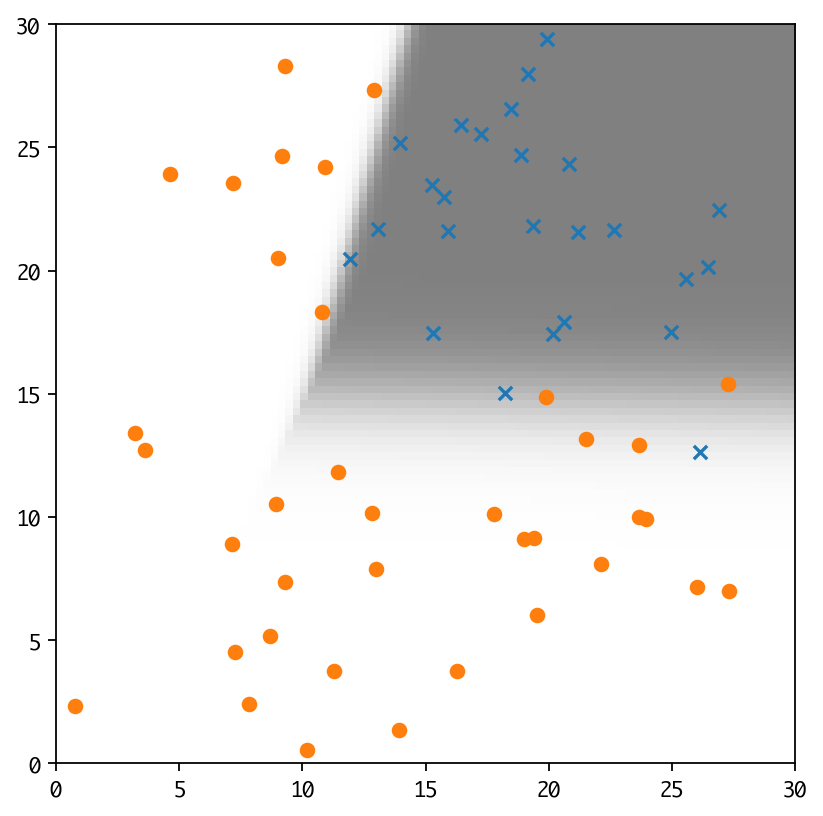

In [8]:
train_set1 = train_set[train_set['t'] == 1]
train_set2 = train_set[train_set['t'] == 0]

fig = plt.figure(figsize=(6, 6))
subplot = fig.add_subplot(1, 1, 1)
subplot.set_ylim([0, 30])
subplot.set_xlim([0, 30])
subplot.scatter(train_set1.x1, train_set1.x2, marker = 'x')
subplot.scatter(train_set2.x1, train_set2.x2, marker = 'o')

locations = []
for x2 in np.linspace(0, 30, 100):
    for x1 in np.linspace(0, 30, 100):
        locations.append((x1, x2))

p_vals = sess.run(p, feed_dict={x:locations})
p_vals = p_vals.reshape((100, 100))
subplot.imshow(p_vals, origin='lower', extent=(0, 30, 0, 30), cmap=plt.cm.gray_r, alpha=0.5)